In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [127]:
df = pd.read_csv("climate_annual.txt", delim_whitespace=True)
df.shape

(2793, 20)

In [128]:
df.head()

,State,StateCode,Year,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX
0,Alabama,1,1960,51.03,738.5,-1.29,-0.66,-2.77,-1.92,1824.0,3338.0,-1.10,-1.87,-2.03,-1.38,-1.05,-0.02,-3.81,596.7,880.2
1,Alabama,1,1961,69.83,743.2,25.12,25.12,16.53,22.97,1526.0,2881.0,5.98,5.71,5.56,7.89,9.06,7.57,4.94,601.6,885.1
2,Alabama,1,1962,50.10,756.6,-12.24,1.73,-9.24,-2.39,2008.0,2986.0,-2.20,-0.32,0.48,1.53,4.94,8.75,11.73,609.9,903.1
3,Alabama,1,1963,48.81,740.8,-17.83,-21.56,-4.84,-16.61,1820.0,3258.0,-3.08,-4.37,-5.58,-6.85,-9.42,-10.83,-1.40,591.2,890.1
4,Alabama,1,1964,66.50,748.8,18.22,15.22,10.19,13.87,1787.0,2924.0,5.50,7.35,9.05,9.15,9.55,6.93,-3.01,608.1,889.8


In [129]:
df2 = df.set_index("State")
df2.head()

,StateCode,Year,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX
State,,,,,,,,,,,,,,,,,,,
Alabama,1,1960,51.03,738.5,-1.29,-0.66,-2.77,-1.92,1824.0,3338.0,-1.10,-1.87,-2.03,-1.38,-1.05,-0.02,-3.81,596.7,880.2
Alabama,1,1961,69.83,743.2,25.12,25.12,16.53,22.97,1526.0,2881.0,5.98,5.71,5.56,7.89,9.06,7.57,4.94,601.6,885.1
Alabama,1,1962,50.10,756.6,-12.24,1.73,-9.24,-2.39,2008.0,2986.0,-2.20,-0.32,0.48,1.53,4.94,8.75,11.73,609.9,903.1
Alabama,1,1963,48.81,740.8,-17.83,-21.56,-4.84,-16.61,1820.0,3258.0,-3.08,-4.37,-5.58,-6.85,-9.42,-10.83,-1.40,591.2,890.1
Alabama,1,1964,66.50,748.8,18.22,15.22,10.19,13.87,1787.0,2924.0,5.50,7.35,9.05,9.15,9.55,6.93,-3.01,608.1,889.8


In [139]:
df3 = df2.loc["California":"California", ["Year", "PCP", "ZNDX"]]
df3.head()

,Year,PCP,ZNDX
State,,,
California,1960,21.77,-4.36
California,1961,16.53,-6.81
California,1962,22.10,-0.68
California,1963,24.74,9.90
California,1964,22.27,2.69


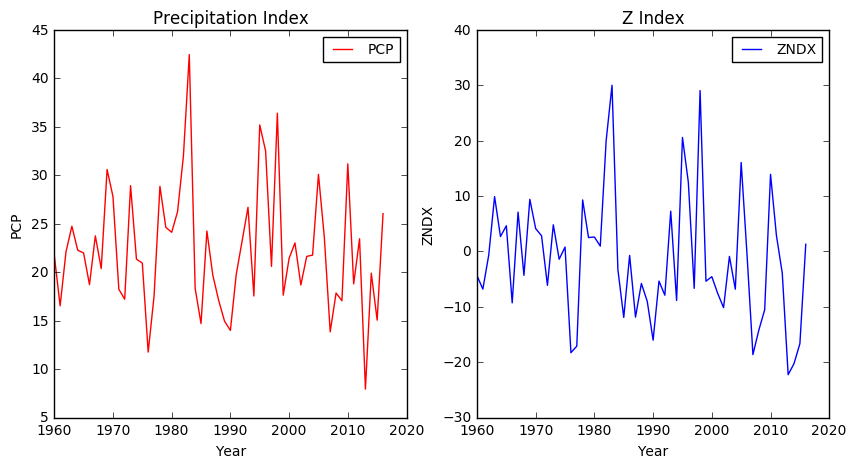

In [131]:
fig=plt.figure(figsize=(10,5))
#fig.suptitle('Precipitation', fontsize=14, fontweight='bold')

fig.add_subplot(121)
plt.plot(df3['Year'], df3['PCP'],label='PCP',c='r')
plt.legend(loc=0,fontsize=10)
plt.title('Precipitation Index')
plt.xlabel('Year')
plt.ylabel('PCP')

fig.add_subplot(122)
plt.plot(df3['Year'], df3['ZNDX'],label='ZNDX')
plt.legend(loc=0,fontsize=10)
plt.title('Z Index')
plt.xlabel('Year')
plt.ylabel('ZNDX')
plt.show()

In [140]:
print(df3.PCP.values)

PCP_array = df3.PCP.values
print(PCP_array.reshape(-1,1).shape)

result = []
for i in range(len(PCP_array) - 2):
    result.append([PCP_array[i], PCP_array[i+1], PCP_array[i+2]])
PCP_newx = np.array(result)
PCP_newy = df3.PCP.values[3:].reshape(-1,1)

PCP_newx_train = PCP_newx[:-6]
PCP_newy_train = PCP_newy[:-5]
PCP_newx_test = PCP_newx[-6:]
PCP_newy_test = PCP_newy[-5:]

print(PCP_newx_test)
print(PCP_newy_test)
print(PCP_newx_test.shape)
print(PCP_newy_test.shape)

[ 21.77  16.53  22.1   24.74  22.27  21.98  18.72  23.75  20.37  30.6
  27.81  18.24  17.21  28.93  21.35  20.94  11.75  17.53  28.86  24.63
  24.12  26.24  31.99  42.46  18.32  14.7   24.25  19.71  17.1   14.95
  13.99  19.79  23.23  26.7   17.54  35.2   32.51  20.6   36.41  17.63
  21.43  23.02  18.68  21.63  21.76  30.1   23.61  13.84  17.85  17.05
  31.18  18.79  23.45   7.93  19.9   15.05  26.04]
(57, 1)
[[ 17.05  31.18  18.79]
 [ 31.18  18.79  23.45]
 [ 18.79  23.45   7.93]
 [ 23.45   7.93  19.9 ]
 [  7.93  19.9   15.05]
 [ 19.9   15.05  26.04]]
[[ 23.45]
 [  7.93]
 [ 19.9 ]
 [ 15.05]
 [ 26.04]]
(6, 3)
(5, 1)


23.486378352
[ 15.05        26.04        23.48637835]
[ 22.56298676]
[ 26.04        23.48637835  22.56298676]
[ 22.74350142]


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:31: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


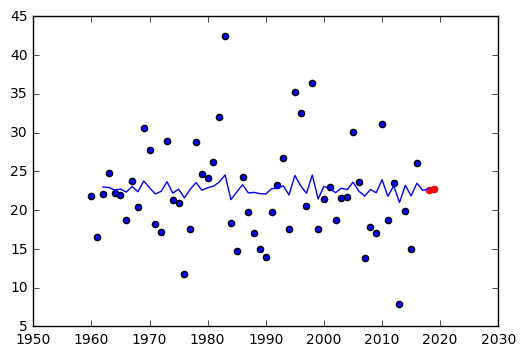

In [143]:
#Lasso regression
regr = linear_model.Lasso()
regr.fit(PCP_newx_train, PCP_newy_train)

PCP_lassoy_train = regr.predict(PCP_newx_train)
PCP_lassoy_test = regr.predict(PCP_newx_test)

#print(PCP_lassoy_train.shape)
#print(PCP_lassoy_test.shape)

year_all = np.append(df3.Year.values, [2017, 2018, 2019])
y_lasso = np.append(PCP_lassoy_train, PCP_lassoy_test)

PCP_17_y = y_lasso[-1]
print(PCP_17_y)
PCP_18_x = np.append(PCP_array[-2:], PCP_17_y)
print(PCP_18_x)
PCP_18_y = regr.predict(PCP_18_x)
print(PCP_18_y)

PCP_18 = PCP_18_y.item(0)
PCP_19_x = np.append(PCP_18_x[-2:], PCP_18)
print(PCP_19_x)
PCP_19_y = regr.predict(PCP_19_x)
print(PCP_19_y)
PCP_19 = PCP_19_y.item(0)

y_lasso_all = np.append(y_lasso, [PCP_18, PCP_19])

plt.figure()
plt.scatter(df3.Year.reshape(-1,1), df3.PCP)
#plt.plot(df.Year[2:-1].reshape(-1,1), y_lasso[:-1])
plt.scatter(year_all[-2:].reshape(-1,1), y_lasso_all[-2:], color='red')
plt.plot(year_all[2:-1].reshape(-1,1), y_lasso_all)
plt.show()

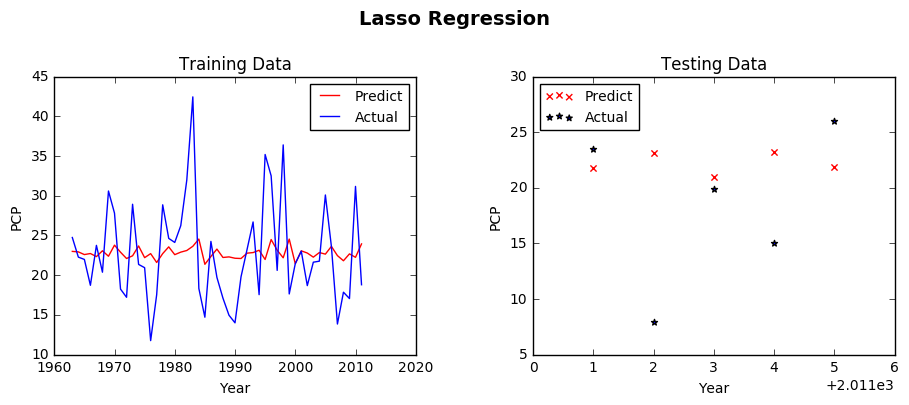

In [142]:
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Lasso Regression', fontsize=14, fontweight='bold')

#Plot for training data
fig.add_subplot(121)
plt.plot(df3.Year[3:-5],regr.predict(PCP_newx_train),label='Predict',c='r')
plt.plot(df3.Year[3:-5],PCP_newy_train,label='Actual')
plt.legend(loc=0,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('PCP')
         
#Plot for testing data
fig.add_subplot(122)
plt.scatter(df3.Year[-5:],regr.predict(PCP_newx_test)[:-1],marker='x',c='r',label='Predict')
plt.scatter(df3.Year[-5:],PCP_newy_test, marker='*',label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('PCP')

plt.tight_layout(pad=4, w_pad=4)
plt.show()